In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [91]:
df = pd.read_csv("C:/Users/harsh/OneDrive/Desktop/internship/sentiment.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [92]:
df.shape

(50000, 2)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Sentiment distribution')

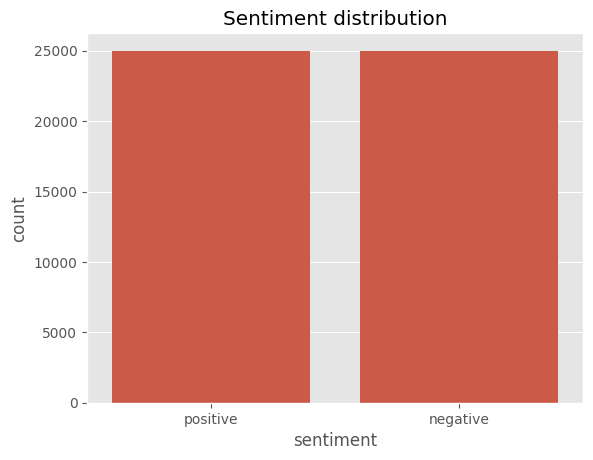

In [94]:
sns.countplot(x='sentiment',data=df)
plt.title("Sentiment distribution")

In [95]:
for i in range(5):
    print("review: ",[i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i],"\n\n")

review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [96]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [97]:
df['word count'] = df['review'].apply(no_of_words)

In [98]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


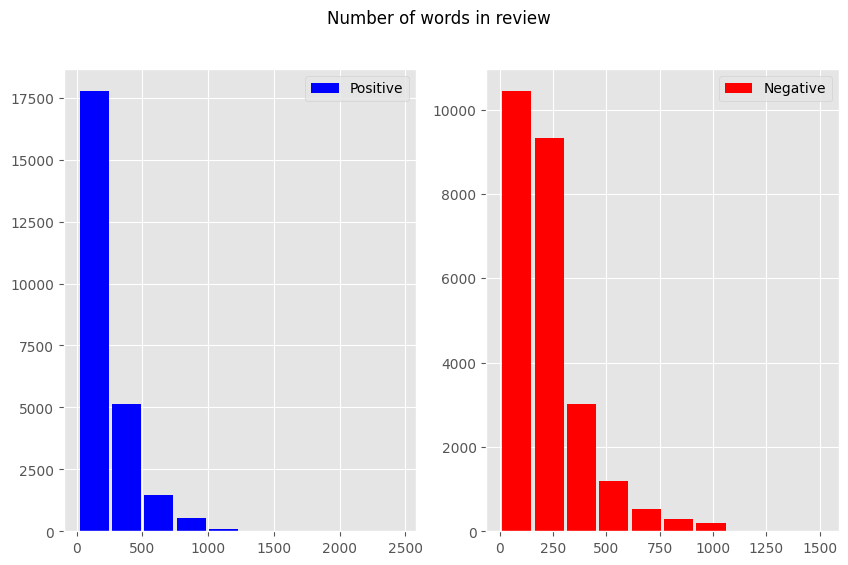

In [99]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label='Positive', color='blue', rwidth=0.9)
ax[0].legend(loc='upper right')
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label='Negative', color='red', rwidth=0.9)
ax[1].legend(loc='upper right')
fig.suptitle("Number of words in review")
plt.show()        

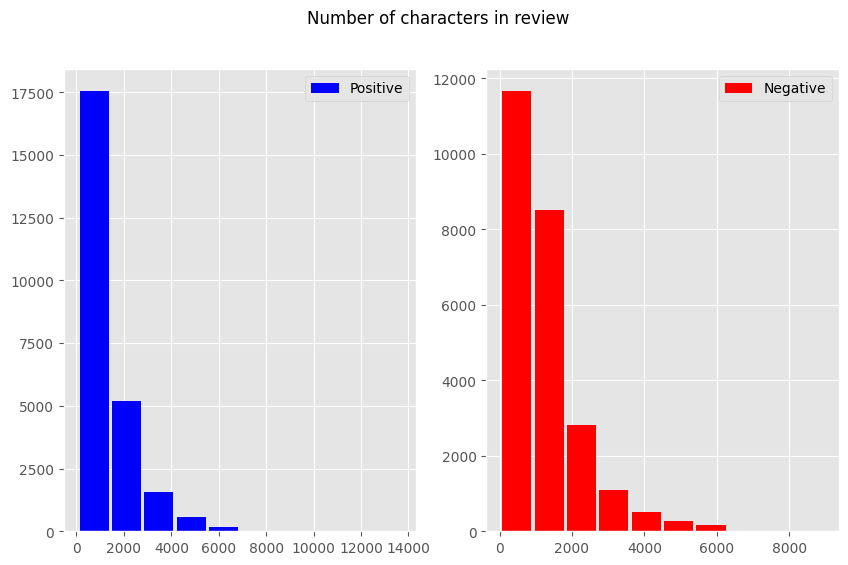

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='blue', rwidth=0.9)
ax[0].legend(loc='upper right')
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='red', rwidth=0.9)
ax[1].legend(loc='upper right')
fig.suptitle("Number of characters in review")
plt.show()

In [101]:
df['sentiment'] = df['sentiment'].replace({'positive': 1, 'negative': 2})

C:\Users\harsh\AppData\Local\Temp\ipykernel_20048\845294701.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment'] = df['sentiment'].replace({'positive': 1, 'negative': 2})


In [102]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,2,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [103]:
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '',text)
    text = re.sub(r"https\S+|www\S+|https\S+",'', text, flags = re.MULTLINE)
    text =re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [104]:
df.review = df['review'].apply(data_processing)

AttributeError: module 're' has no attribute 'MULTLINE'

In [105]:
duplicated_count = df.duplicated().sum()
print("number of duplicate entries:", duplicated_count)

number of duplicate entries: 418


In [106]:
df = df.drop_duplicates('review')

In [107]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [111]:
df.review = df['review'].apply(lambda x: stemming(x))

In [112]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,2,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [117]:
pos_reviews = df[df.sentiment == 1]
pos_reviews.head()


,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230
5,"Probably my all-time favorite movie, a story o...",1,119


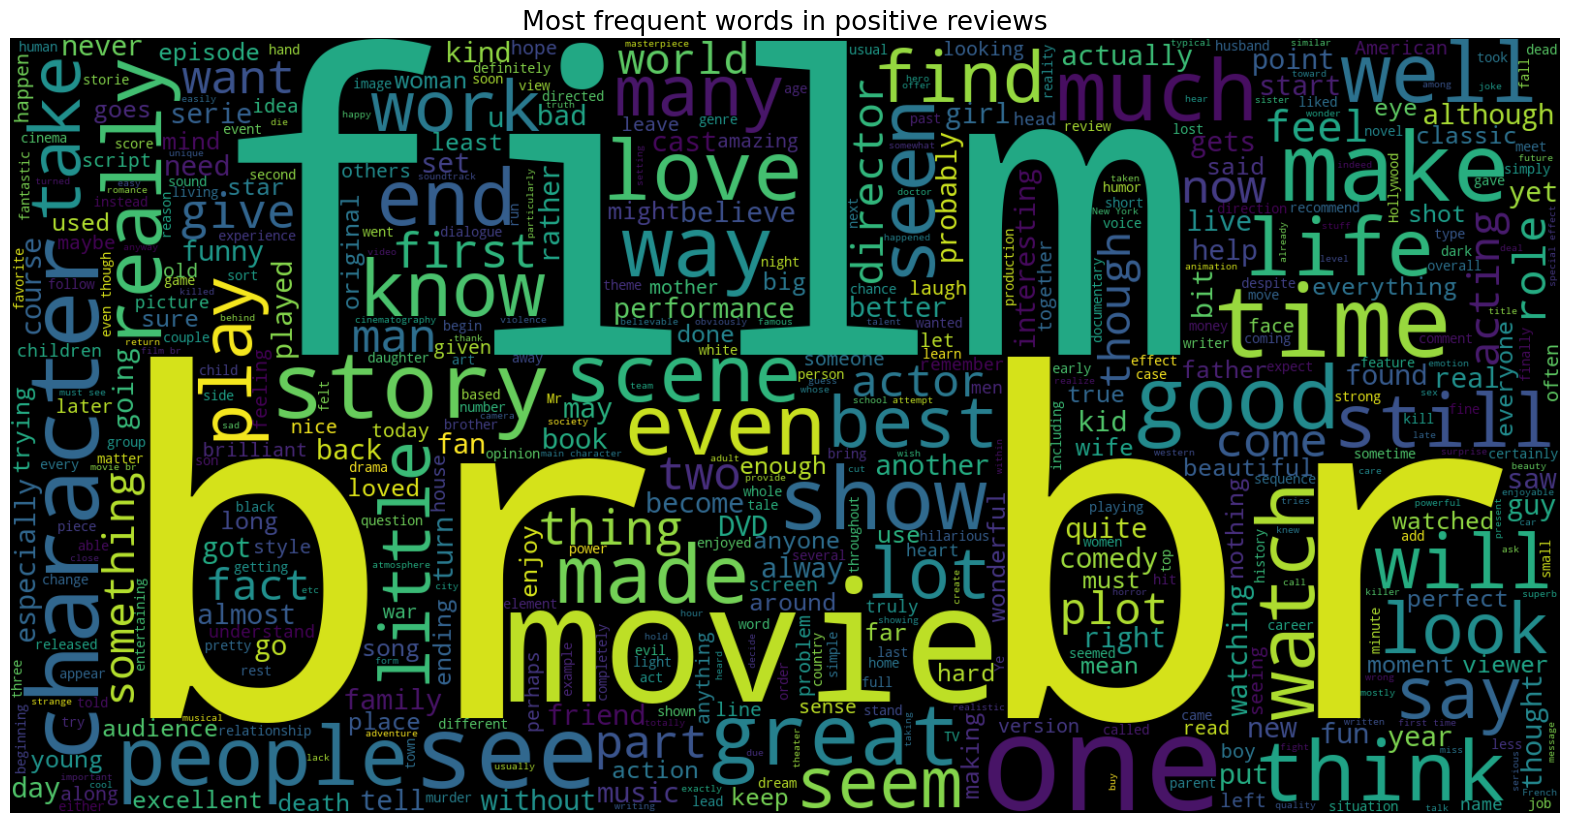

In [118]:
text =' '.join([word for word in pos_reviews['review']])
plt.figure(figsize = (20,25), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [120]:

from collections import Counter

count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] += 1
print(count.most_common(15))



[('the', 290932), ('and', 165372), ('a', 155251), ('of', 148673), ('to', 127921), ('is', 107829), ('in', 90145), ('that', 62191), ('I', 61914), ('it', 53162), ('this', 51403), ('/><br', 48800), ('as', 46419), ('with', 43153), ('was', 41934)]


In [121]:
pos_words =pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,the,290932
1,and,165372
2,a,155251
3,of,148673
4,to,127921


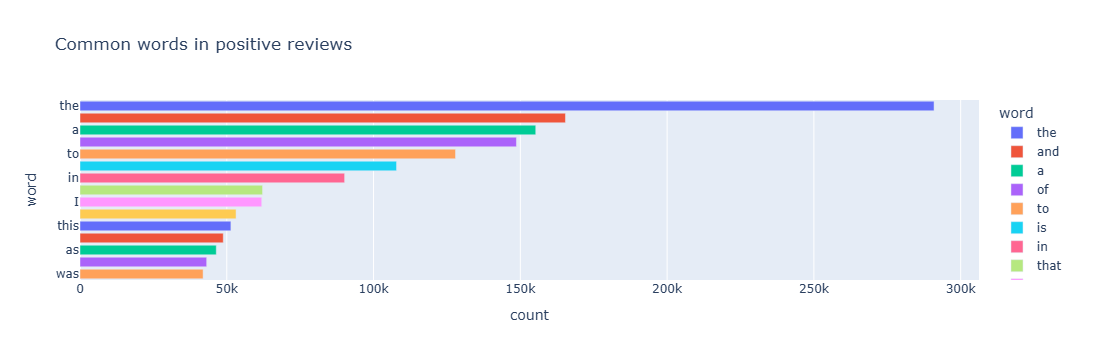

In [122]:
px.bar(pos_words, x='count', y='word', title= 'Common words in positive reviews', color ='word')

In [123]:
neg_reviews = df[df.sentiment == 2]
neg_reviews.head()

,review,sentiment,word count
3,Basically there's a family where a little boy ...,2,138
7,"This show was an amazing, fresh & innovative i...",2,174
8,Encouraged by the positive comments about this...,2,130
10,Phil the Alien is one of those quirky films wh...,2,96
11,I saw this movie when I was about 12 when it c...,2,180


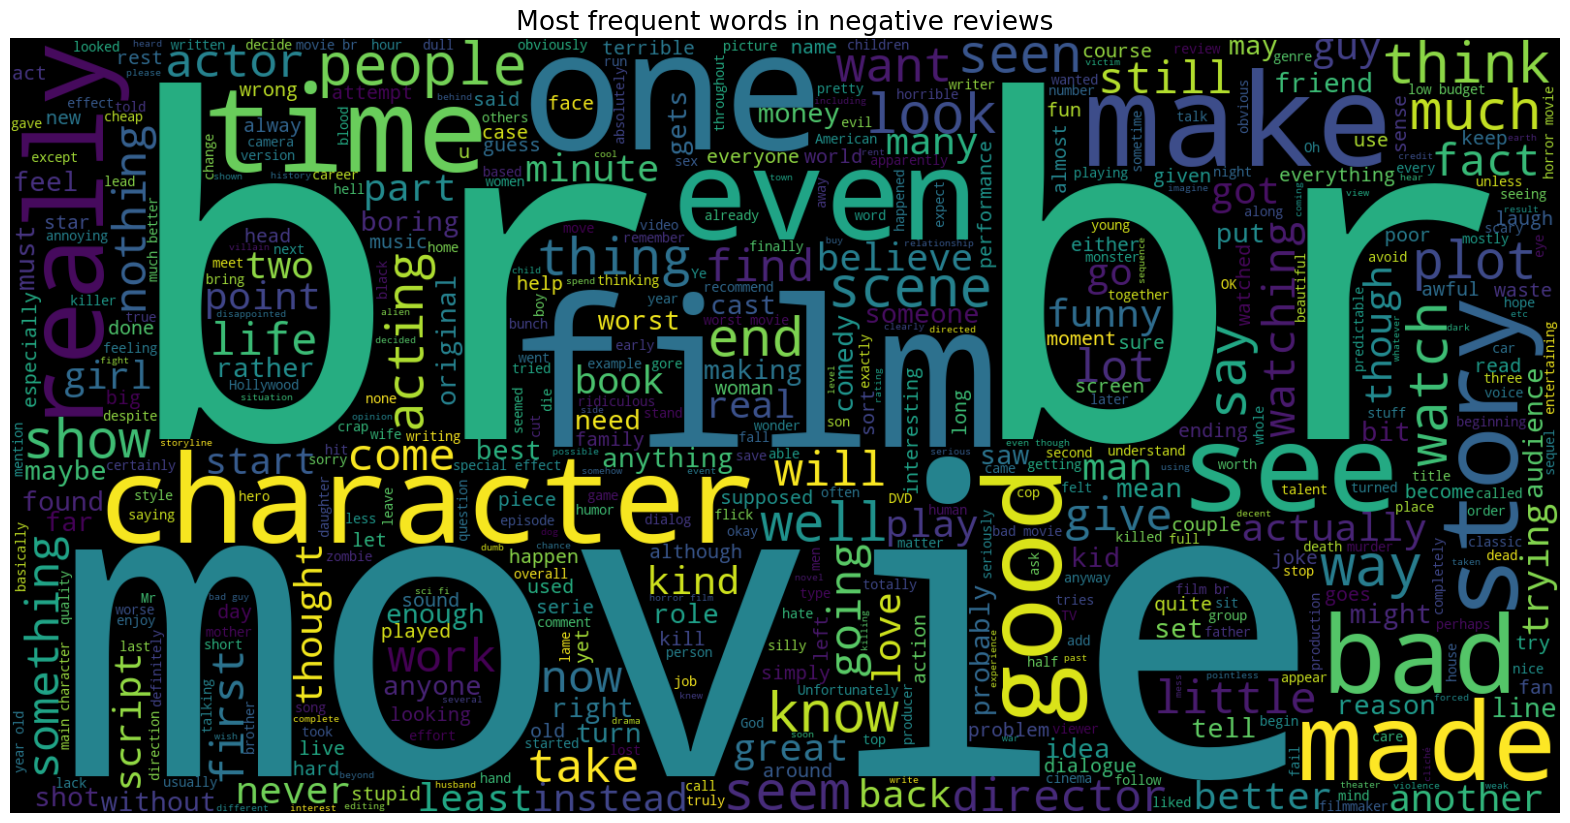

In [125]:
text =' '.join([word for word in neg_reviews['review']])
plt.figure(figsize = (20,25), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [127]:

from collections import Counter

count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] += 1
print(count.most_common(15))



[('the', 273542), ('a', 149568), ('and', 134388), ('of', 132924), ('to', 131974), ('is', 93846), ('in', 78593), ('I', 69449), ('that', 63687), ('this', 61414), ('it', 53956), ('/><br', 51411), ('was', 49969), ('for', 39373), ('with', 38797)]


In [128]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.colums = ['word', 'count']
neg_words.head()

C:\Users\harsh\AppData\Local\Temp\ipykernel_20048\3970844408.py:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,0,1
0,the,273542
1,a,149568
2,and,134388
3,of,132924
4,to,131974


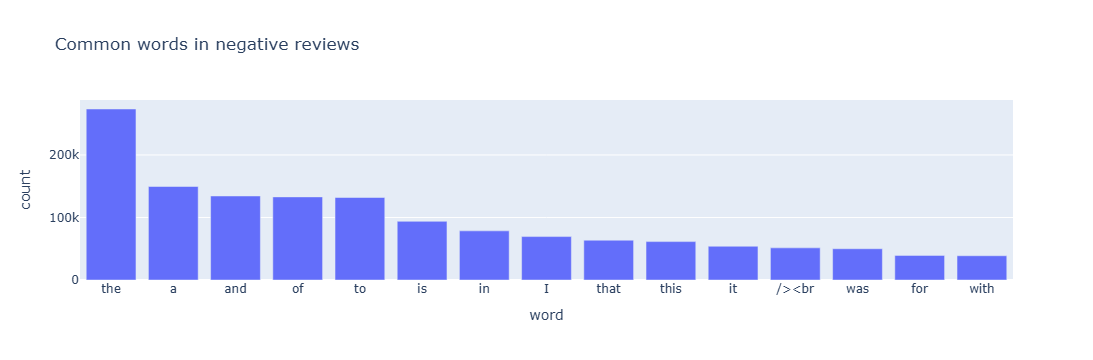

In [134]:

import pandas as pd
import plotly.express as px

neg_words = Counter(' '.join(neg_reviews['review']).split())
neg_words = neg_words.most_common(15)
neg_words_df = pd.DataFrame(neg_words, columns=['word', 'count'])

px.bar(neg_words_df, x='word', y='count', title='Common words in negative reviews')


In [135]:
x = df['review']
y = df['sentiment']

In [137]:
vect = TfidfVectorizer()
x = vect.fit_transform(df['review'])

In [140]:
from sklearn.model_selection import train_test_split

X = df['review']
Y = df['sentiment']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)



In [143]:
print("size of x_train: ", (x_train.shape))
print("size of y_train: ", (y_train.shape))
print("size of x_test:", (x_test.shape))
print("size of y_test:", (y_test.shape))

size of x_train:  (34707,)
size of y_train:  (34707,)
size of x_test: (14875,)
size of y_test: (14875,)


In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [147]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the training data and transform both the training and test data
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

# Create a LogisticRegression object
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(x_train_tfidf, y_train)

# Make predictions on the test data
logreg_pred = logreg.predict(x_test_tfidf)

# Calculate the accuracy of the model
logreg_acc = accuracy_score(y_test, logreg_pred)

# Print the accuracy
print("Test accuracy: {:.2f}%".format(logreg_acc*100))


Test accuracy: 89.59%


In [148]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[6770  701]
 [ 848 6556]]


              precision    recall  f1-score   support

           1       0.89      0.91      0.90      7471
           2       0.90      0.89      0.89      7404

    accuracy                           0.90     14875
   macro avg       0.90      0.90      0.90     14875
weighted avg       0.90      0.90      0.90     14875



In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the training data and transform both the training and test data
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

# Create a MultinomialNB object
mnb = MultinomialNB()

# Fit the model to the training data
mnb.fit(x_train_tfidf, y_train)

# Make predictions on the test data
mnb_pred = mnb.predict(x_test_tfidf)

# Calculate the accuracy of the model
mnb_acc = accuracy_score(y_test, mnb_pred)

# Print the accuracy
print("Test accuracy: {:.2f}%".format(mnb_acc*100))


Test accuracy: 86.14%


In [151]:

print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[6283 1188]
 [ 873 6531]]


              precision    recall  f1-score   support

           1       0.88      0.84      0.86      7471
           2       0.85      0.88      0.86      7404

    accuracy                           0.86     14875
   macro avg       0.86      0.86      0.86     14875
weighted avg       0.86      0.86      0.86     14875



In [152]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the training data and transform both the training and test data
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

# Create a LinearSVC object
svc = LinearSVC()

# Fit the model to the training data
svc.fit(x_train_tfidf, y_train)

# Make predictions on the test data
svc_pred = svc.predict(x_test_tfidf)

# Calculate the accuracy of the model
svc_acc = accuracy_score(y_test, svc_pred)

# Print the accuracy
print("Test accuracy: {:.2f}%".format(svc_acc*100))




Test accuracy: 89.94%


In [157]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6777  694]
 [ 803 6601]]


              precision    recall  f1-score   support

           1       0.89      0.91      0.90      7471
           2       0.90      0.89      0.90      7404

    accuracy                           0.90     14875
   macro avg       0.90      0.90      0.90     14875
weighted avg       0.90      0.90      0.90     14875



In [155]:

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

param_grid = {'C':[0.1, 1, 10, 100]}
svc = LinearSVC(max_iter=10000)
grid = GridSearchCV(svc, param_grid, refit=True, verbose=3)
grid.fit(x_train_tfidf, y_train)



Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .............................C=0.1;, score=0.886 total time=   0.3s
[CV 2/5] END .............................C=0.1;, score=0.901 total time=   0.3s
[CV 3/5] END .............................C=0.1;, score=0.889 total time=   0.3s
[CV 4/5] END .............................C=0.1;, score=0.891 total time=   0.3s
[CV 5/5] END .............................C=0.1;, score=0.895 total time=   0.3s
[CV 1/5] END ...............................C=1;, score=0.887 total time=   0.6s
[CV 2/5] END ...............................C=1;, score=0.900 total time=   0.7s
[CV 3/5] END ...............................C=1;, score=0.892 total time=   0.5s
[CV 4/5] END ...............................C=1;, score=0.895 total time=   0.5s
[CV 5/5] END ...............................C=1;, score=0.898 total time=   0.5s
[CV 1/5] END ..............................C=10;, score=0.874 total time=   2.1s
[CV 2/5] END ..............................C=10;,

GridSearchCV(estimator=LinearSVC(max_iter=10000),
             param_grid={'C': [0.1, 1, 10, 100]}, verbose=3)

In [156]:
print("best cross validation score: {:.2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

best cross validation score: 0.89
best parameters:  {'C': 1}


In [159]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the training data and transform both the training and test data
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

# Create a LinearSVC object
svc = LinearSVC(C = 1, loss ='hinge')

# Fit the model to the training data
svc.fit(x_train_tfidf, y_train)

# Make predictions on the test data
svc_pred = svc.predict(x_test_tfidf)

# Calculate the accuracy of the model
svc_acc = accuracy_score(y_test, svc_pred)

# Print the accuracy
print("Test accuracy: {:.2f}%".format(svc_acc*100))


Test accuracy: 90.16%


In [160]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6786  685]
 [ 778 6626]]


              precision    recall  f1-score   support

           1       0.90      0.91      0.90      7471
           2       0.91      0.89      0.90      7404

    accuracy                           0.90     14875
   macro avg       0.90      0.90      0.90     14875
weighted avg       0.90      0.90      0.90     14875

